In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [9]:
data = pd.read_csv("data/titanic/train.csv", index_col="PassengerId")

In [10]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [53]:
X.isna().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

## Survived based on sex

In [54]:
sex_df = X_train[["Sex", "Name"]].copy()
sex_df["Survived"] = y_train

sex_df.reset_index().groupby(["Sex", "Survived"]).count()

PassengerId  Name
Sex    Survived                   
female 0                  49    49
       1                 147   147
male   0                 268   268
       1                  70    70

In [55]:
sexes = ["male", "female"]
sex2num = {sexes[i]: i for i in range(len(sexes))}

sex_encoded = X_dev["Sex"].apply(lambda sex: sex2num.get(sex))

In [56]:
print("Accuracy :", accuracy_score(y_dev, y_dev_hat))
print("f1-score: ", f1_score(y_dev, sex_encoded))

Accuracy : 0.8089887640449438
f1-score:  0.6909090909090909


## Passenger class

In [58]:
X_train.groupby("Pclass")["Name"].count()

Pclass
1    137
2    111
3    286
Name: Name, dtype: int64

In [76]:
def sex_pclass_transform(X):
    new_X = X[['Pclass']].copy()
    new_X = X[['SibSp']].copy()
    #new_X["sex"] = X["Sex"].apply(lambda sex: sex2num.get(sex))
    return new_X

from sklearn.tree import DecisionTreeClassifier, export_graphviz

clf = DecisionTreeClassifier()
clf.fit(sex_pclass_transform(X_train), y_train)
y_dev_hat = clf.predict(sex_pclass_transform(X_dev))
print("Accuracy :", accuracy_score(y_dev, y_dev_hat))
print("f1-score: ", f1_score(y_dev, sex_encoded))

Accuracy : 0.6573033707865169
f1-score:  0.6909090909090909


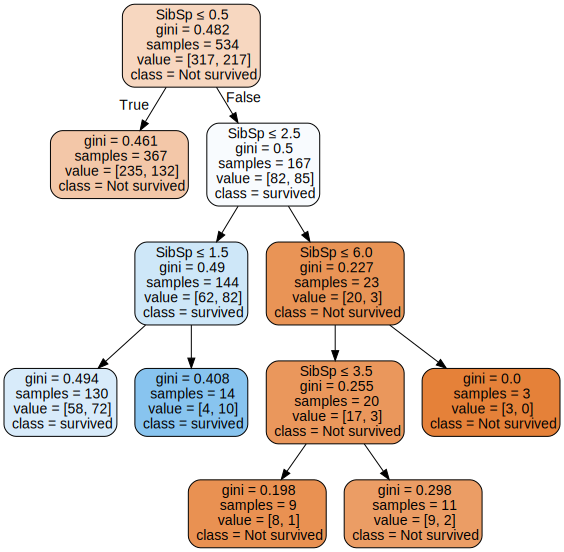

In [77]:
import graphviz 

dot_data = export_graphviz(
    clf, out_file=None, 
    feature_names=sex_pclass_transform(X_train).columns.values,  
    class_names=["Not survived", "survived"],  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [78]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(sex_pclass_transform(X_train), y_train)
y_dev_hat = clf.predict(sex_pclass_transform(X_dev))
print("Accuracy :", accuracy_score(y_dev, y_dev_hat))
print("f1-score: ", f1_score(y_dev, sex_encoded))

Accuracy : 0.6910112359550562
f1-score:  0.6909090909090909


In [80]:
X_train["SibSp"].unique()

array([0, 2, 1, 3, 4, 8])

In [ ]:
one_hot_targets = np.eye(nb_classes)[targets]

In [75]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']
